### Importing packeges

In [1]:
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf

In [2]:
filenames = [r'data_files/kreftregisteret_menn_norge.xlsx', r'data_files/reseptregisteret_menn_norge.xls']

files = []
for i in range(len(filenames)):
    files.append(pp.excel_lines(filenames[i]))

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/kreftregisteret_menn_norge.xlsx'

### Cancer registry data

In [3]:
## Keeping on the deci
cancer_registry = pd.DataFrame(files[0], columns= ['Kreftform','Kjønn','Alder','År','Tilfeller','Personår',
                                                   'Insidensrate'])

## X axis tick label
ages_xlabel = []
num_years = 14
for i in range(9):
    ages_xlabel.append(cancer_registry['Alder'][i*num_years])

labels = []
for j in range(num_years):
    labels.append('Year: '+str(cancer_registry['År'][j])+'')

IndexError: list index out of range

In [4]:
cancer_registry
#ages_xlabel

NameError: name 'cancer_registry' is not defined

In [5]:
### Extracting data from excel file
cancer_anus_all_years = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_years,
                                         case = 'Tilfeller', cancer_type = 'Anus')
cancer_other_all_years = pp.excel_extract(filenames[0], keyword = ['År','all'] ,num_parameter = num_years, 
                                          case = 'Tilfeller', cancer_type = 'Munn, andre')

### Plotting bar plot of Men cancer register in Norway

In [6]:
cancer_anus_all_years

[array([0, 0, 0, 0, 1, 6, 4, 3, 3]),
 array([0, 0, 0, 0, 4, 6, 6, 5, 3]),
 array([0, 0, 0, 0, 2, 6, 3, 2, 4]),
 array([0, 0, 0, 0, 4, 6, 1, 3, 5]),
 array([0, 0, 0, 0, 0, 5, 8, 6, 2]),
 array([0, 0, 0, 0, 1, 5, 6, 5, 3]),
 array([ 0,  0,  0,  0,  1,  7,  8, 11,  6]),
 array([0, 0, 0, 1, 2, 7, 6, 3, 2]),
 array([0, 0, 0, 0, 3, 4, 9, 4, 4]),
 array([0, 0, 0, 0, 2, 4, 4, 4, 2]),
 array([ 0,  0,  0,  0,  3,  6, 11,  5,  3]),
 array([ 0,  0,  0,  0,  1,  2, 10,  6,  3]),
 array([ 0,  0,  0,  0,  0,  6, 14,  9,  5]),
 array([ 0,  0,  0,  2,  5,  7, 10,  8,  3])]

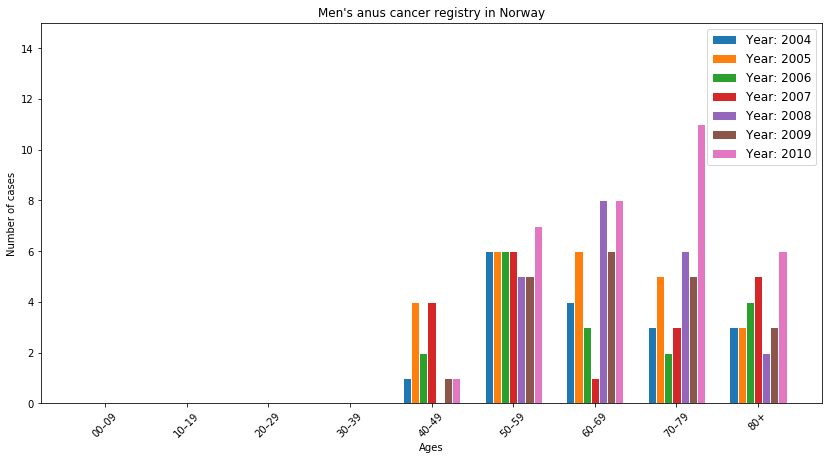

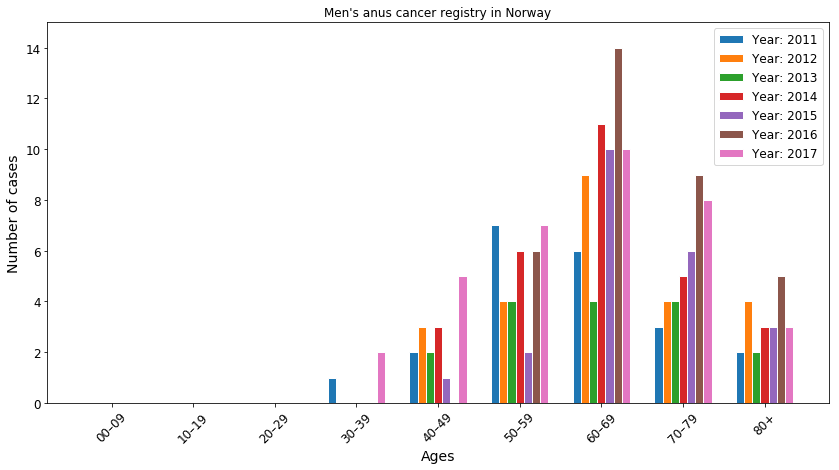

In [7]:
## Anus cancer
fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[0:7], titl="Men's anus cancer registry in Norway", Xlabel='Ages', 
                       Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,15])
ax.legend(labels[0:7])

fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[7:], titl="Men's anus cancer registry in Norway", Xlabel='Ages', 
                       Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,15])
ax.legend(labels[7:])

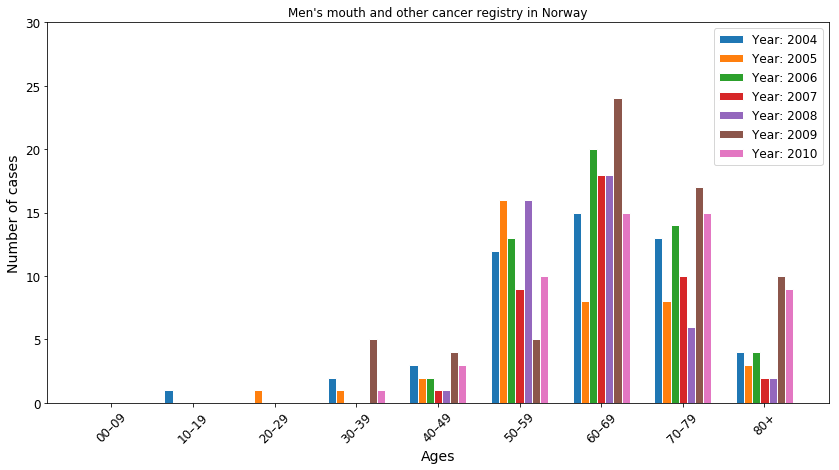

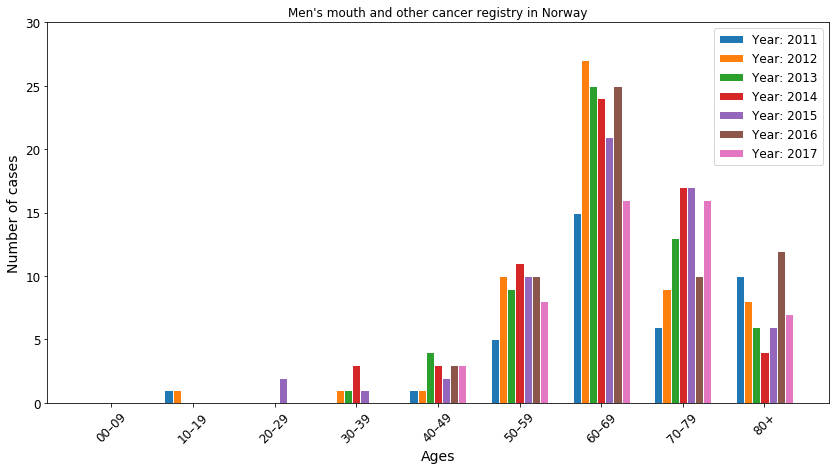

In [8]:
## Other cancer
fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[0:7], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,30])
ax.legend(labels[0:7])

fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[7:], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Number of cases', width = 0.9)
ax.set_ylim([0,30])
ax.legend(labels[7:])

### Incidence case

In [9]:
cancer_anus_all_years = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_years,
                                         case = 'Insidensrate', cancer_type = 'Anus')
cancer_other_all_years = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_years,
                                          case = 'Insidensrate', cancer_type = 'Munn, andre')

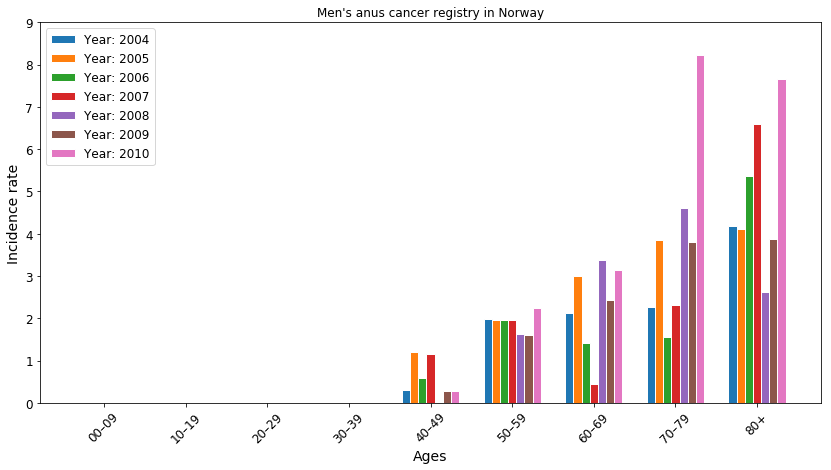

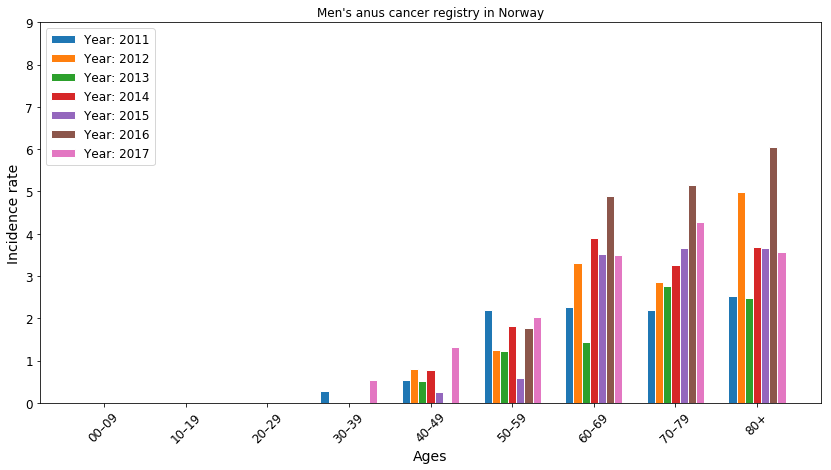

In [10]:
## Anus cancer
fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[0:7], titl="Men's anus cancer registry in Norway", Xlabel='Ages', 
                       Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,9])
ax.legend(labels[0:7])

fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[7:], titl="Men's anus cancer registry in Norway", Xlabel='Ages', 
                       Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,9])
ax.legend(labels[7:])

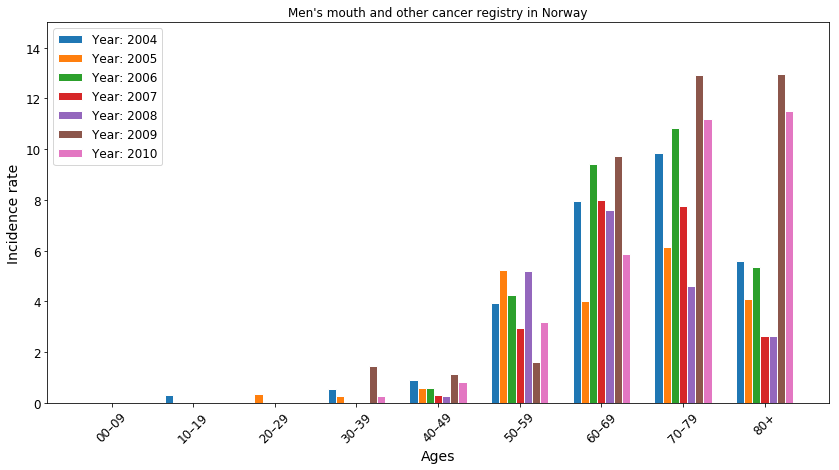

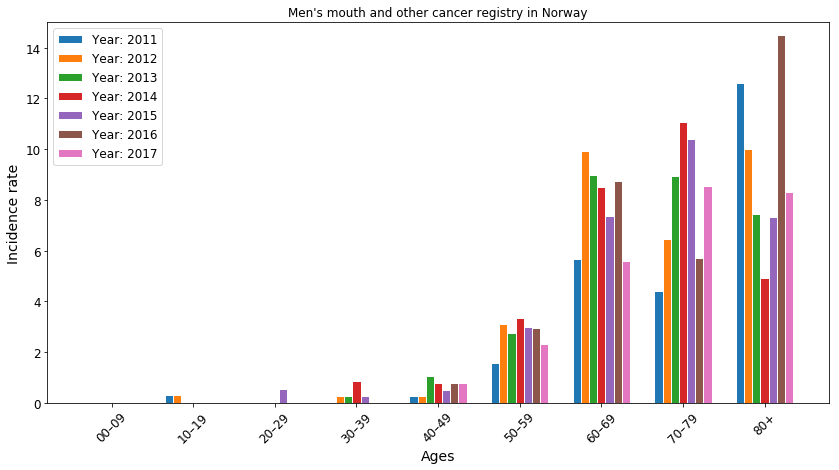

In [11]:
## Other cancer
fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[0:7], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,15])
ax.legend(labels[0:7])

fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[7:], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate', width = 0.9)
ax.set_ylim([0,15])
ax.legend(labels[7:])

### Prescription Database

In [12]:
#files[1][8:293]

In [13]:
dataframe = files[1][8:293]
pd_registry = dataframe

# adding columns with desired 
pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Age'] = dataframe['Unnamed: 2']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

# the date is different for every file
pd_registry.drop(columns = ['Report date: 17/06/2019 14:43'], inplace = True)

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [14]:
#pd_registry

In [15]:
pd_year_label = []
for i in range(4,10):
    pd_year_label.append( 'Year: 200'+str(i)+'' )
for i in range(10,19):
    pd_year_label.append( 'Year: 20'+str(i)+'' )

pd_age = np.array(pd_registry['Age'][0:19])

pd_data = []
for i in range(len(pd_year_label)):
    start = i*len(pd_age)
    end = (1 + i)*len(pd_age)
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( pd_data[i] )

pd_cases = []
for i in range(len(pd_data2)):
    pd_data3 = []
    for j in range(0,len(pd_data2[i])-3,2):
        pd_data3.append( pd_data2[i][j] + pd_data2[i][j+1])
    
    # last three 
    pd_data3.append( pd_data2[i][j+2] + pd_data2[i][j+3] + pd_data2[i][j+4])
    
    pd_cases.append( pd_data3 )

In [16]:
pd_cases[0:8]

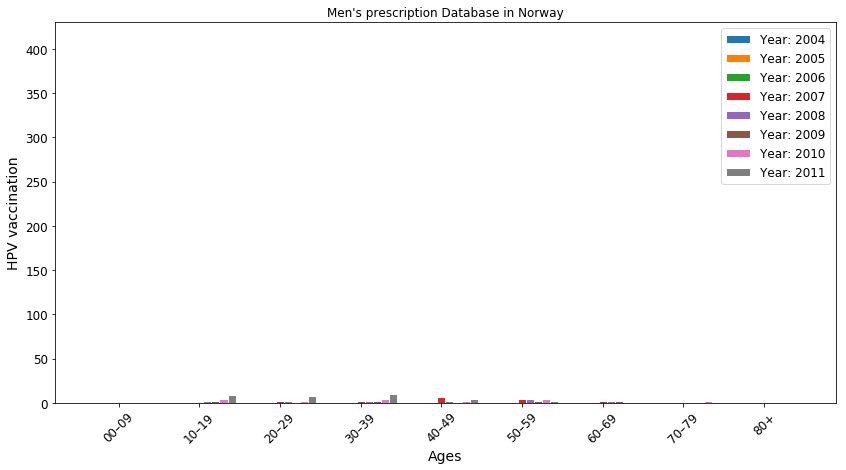

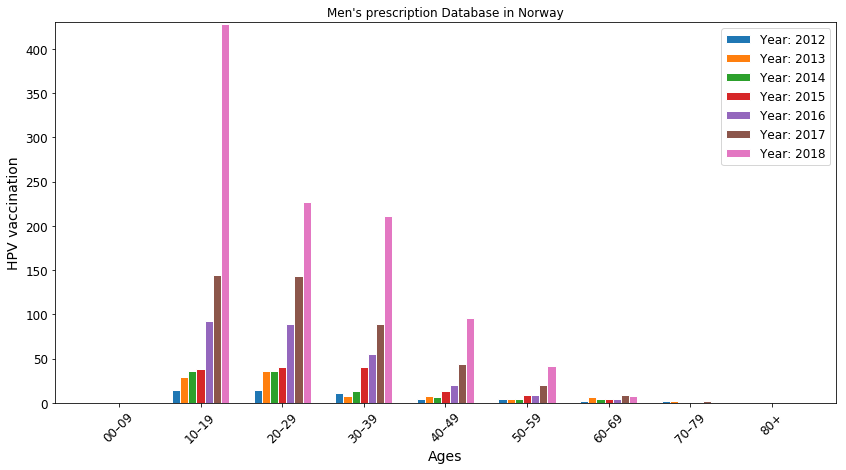

In [17]:
fig, ax = mpf.barplot(ages_xlabel, pd_cases[0:8], titl="Men's prescription Database in Norway", Xlabel='Ages',
                      Ylabel='HPV vaccination', width = 0.9)
ax.set_ylim([0,430])
ax.legend(pd_year_label[0:8])

fig, ax = mpf.barplot(ages_xlabel, pd_cases[8:], titl="Men's prescription Database in Norway", Xlabel='Ages', 
                      Ylabel='HPV vaccination', width = 0.9)
ax.set_ylim([0,430])
ax.legend(pd_year_label[8:])

### Vaccine and cancer in the same plot

In [18]:
x = np.linspace(0,len(ages_xlabel)-1, 9)

(0, 150)

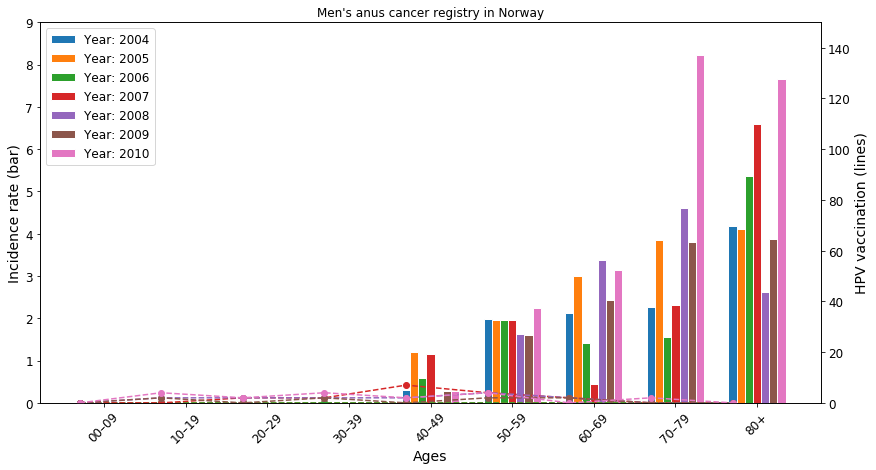

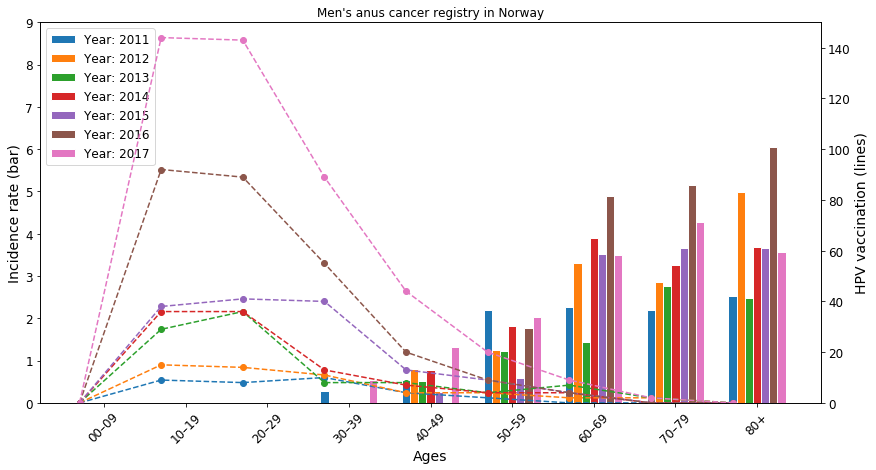

In [19]:
### Anus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[0:7], titl="Men's anus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,9])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,150])

#
fig, ax = mpf.barplot(ages_xlabel, cancer_anus_all_years[7:], titl="Men's anus cancer registry in Norway", 
                      Xlabel='Ages', Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,9])
ax2 = ax.twinx()
for i in range(7, len(cancer_other_all_years)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,150])
#---------------------------------------------------------------------------------------------------------------------

(0, 150)

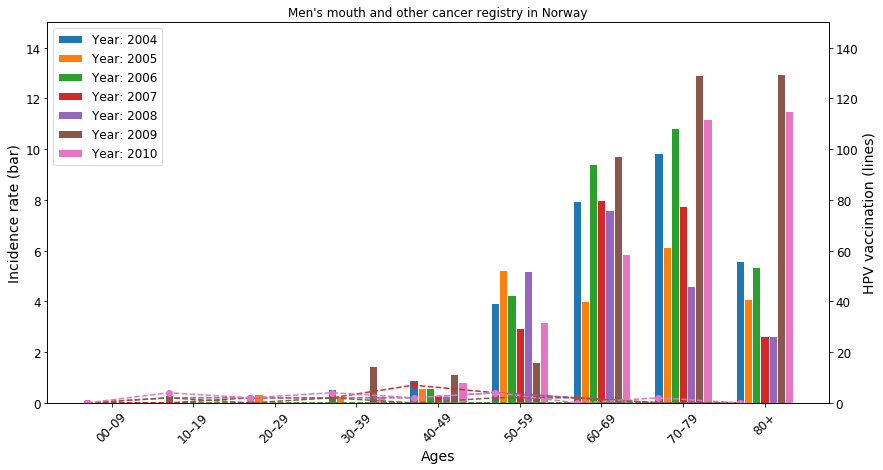

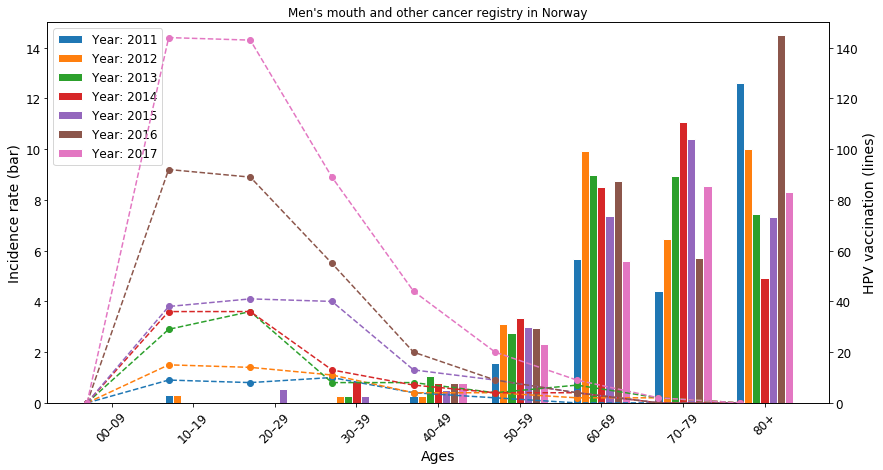

In [20]:
### Mouth and other cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[0:7], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,15])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,150])

#
fig, ax = mpf.barplot(ages_xlabel, cancer_other_all_years[7:], 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Ages', 
                      Ylabel='Incidence rate (bar)', width = 0.9)
ax.set_ylim([0,15])
ax2 = ax.twinx()
for i in range(7, len(cancer_other_all_years)):
    ax2.plot(x, pd_cases[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([0,150])
#---------------------------------------------------------------------------------------------------------------------

#### Vaccine and cancer in the same plot (Total for each year)

In [21]:
total_pd = []
total_cancer_A = []
total_cancer_MO = []

temp1 = np.zeros(len(cancer_other_all_years))
temp2 = np.zeros(len(cancer_other_all_years))
temp3 = np.zeros(len(cancer_other_all_years))
for iage in range(len(ages_xlabel)):
    for iyear in range(len(cancer_other_all_years)):
        temp1[iyear] = temp1[iyear] + pd_cases[iyear][iage]
        temp2[iyear] = temp2[iyear] + cancer_anus_all_years[iyear][iage]
        temp3[iyear] = temp3[iyear] + cancer_other_all_years[iyear][iage]
        
total_pd = temp1
total_cancer_A = temp2
total_cancer_MO = temp3

Text(0, 0.5, 'HPV vaccination (lines)')

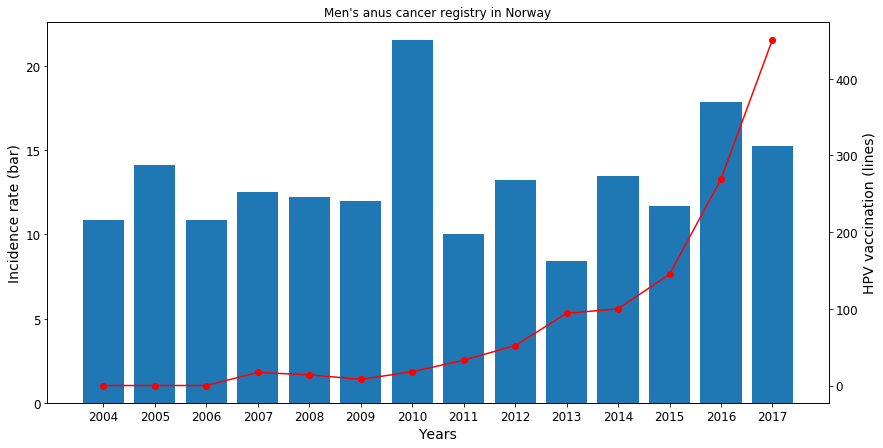

In [22]:
x = np.linspace(0,len(cancer_other_all_years)-1, len(cancer_other_all_years))
year_labels = []
for j in range(num_years):
    year_labels.append(''+str(cancer_registry['År'][j])+'')

### Anus cancer
fig, ax = mpf.barplot(year_labels, total_cancer_A, 
                      titl="Men's anus cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')

Text(0, 0.5, 'HPV vaccination (lines)')

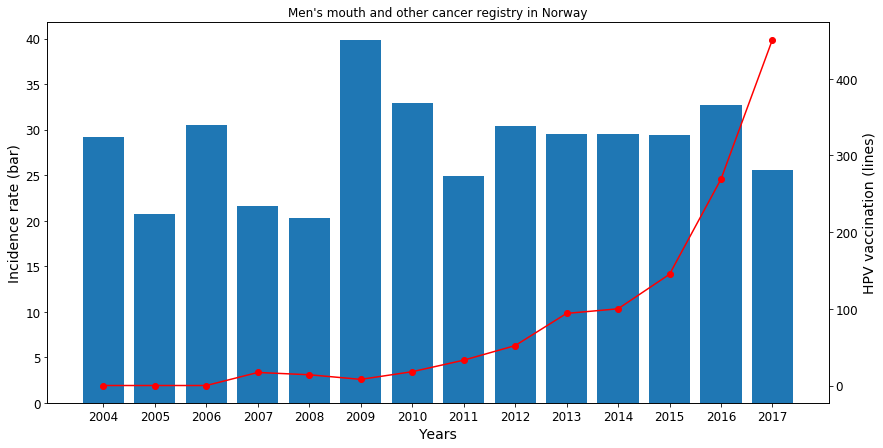

In [23]:
### Mouth and other cancer
fig, ax = mpf.barplot(year_labels, total_cancer_MO, 
                      titl="Men's mouth and other cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')

### Incidence rate for each cancer type

In [24]:
from matplotlib.ticker import MaxNLocator

In [25]:
x = np.linspace(0,8,9)

c_label = ['Anus','Mouth and other']
ages = ['as'] + ages_xlabel

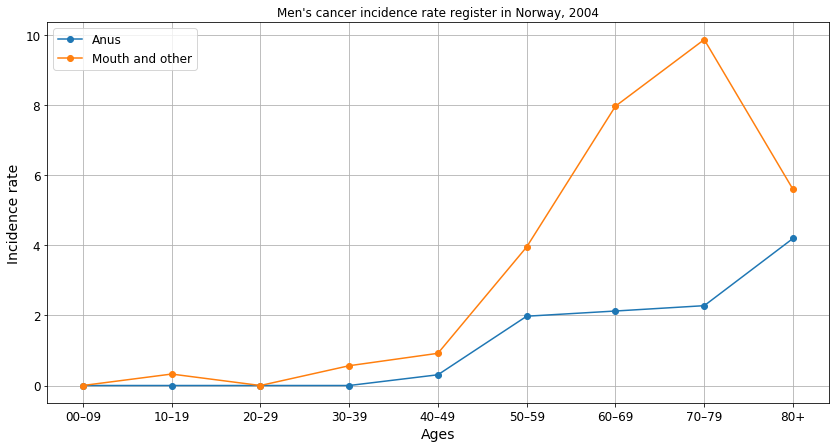

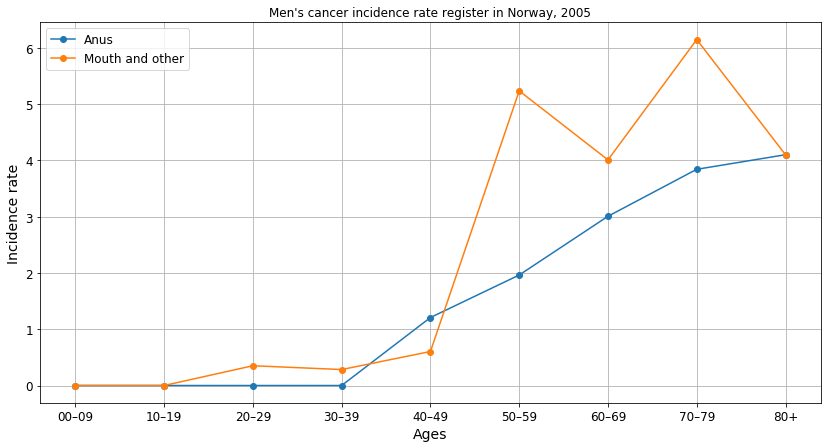

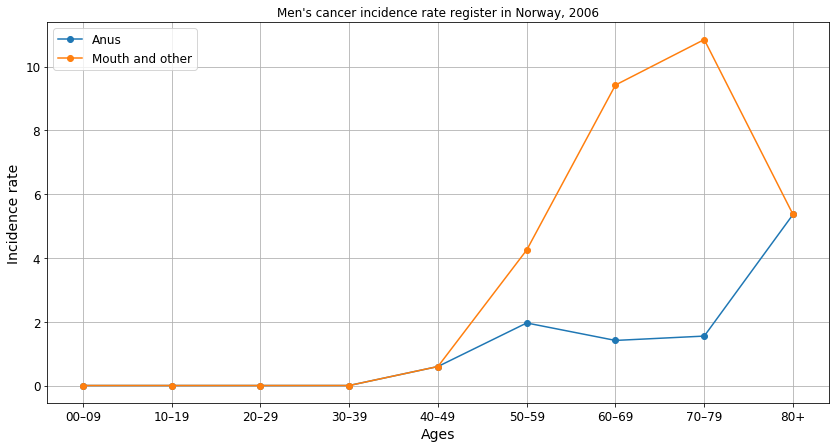

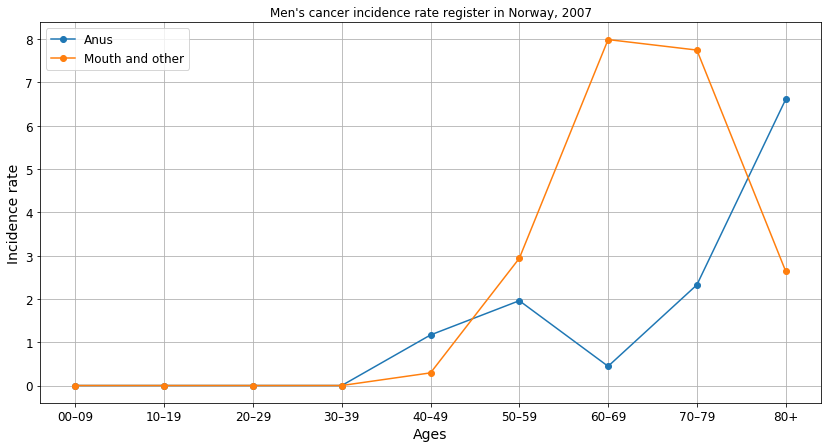

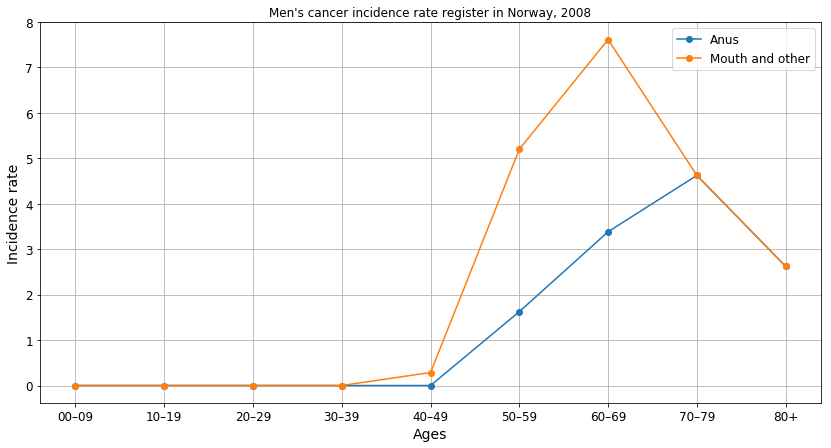

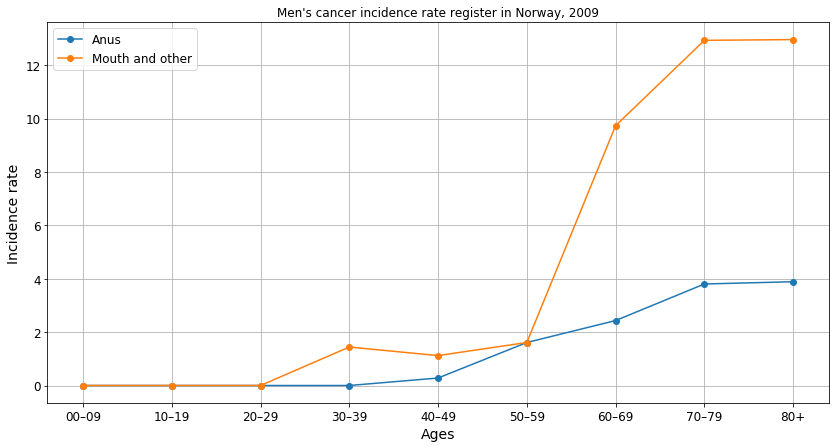

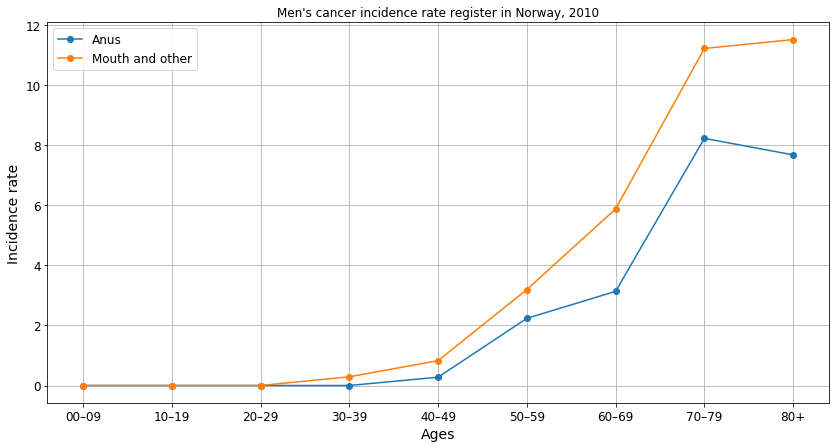

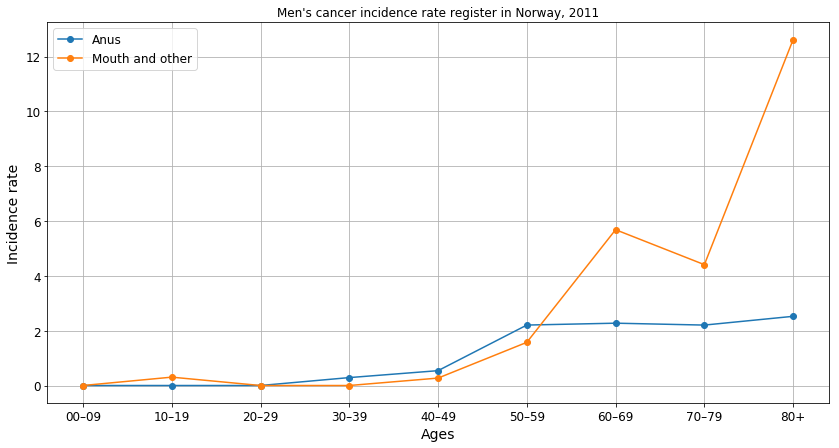

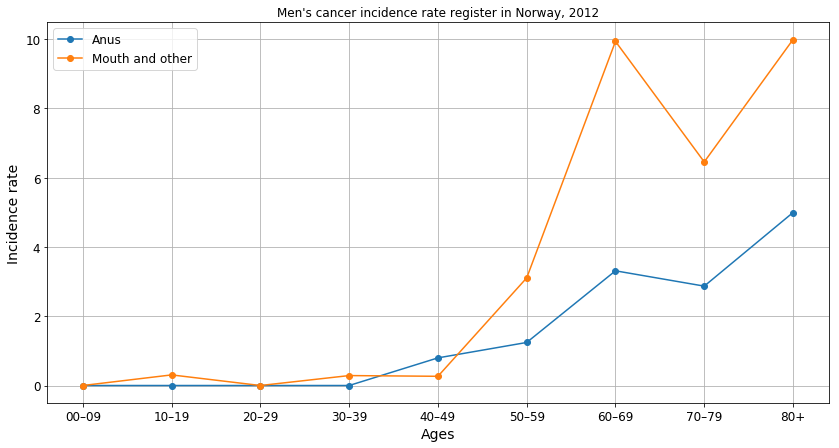

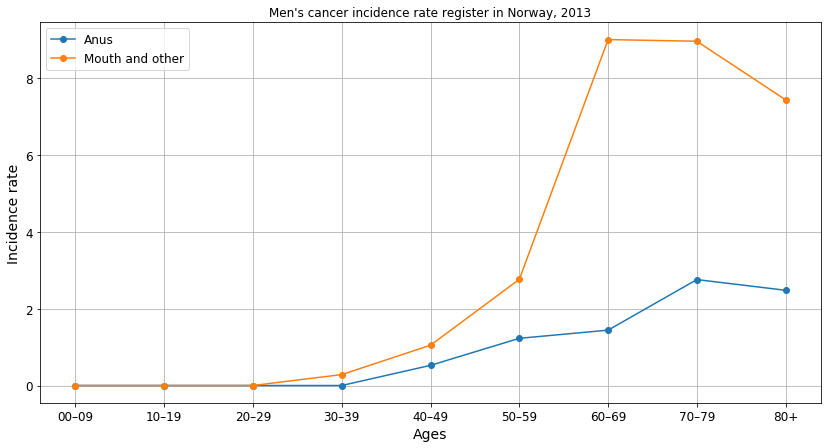

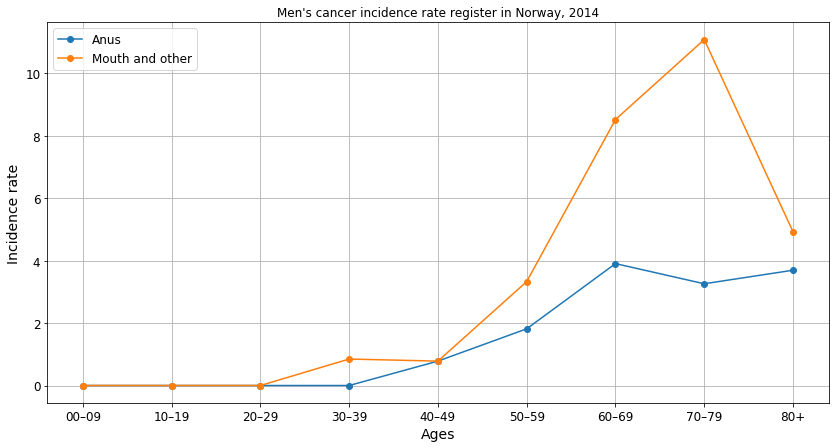

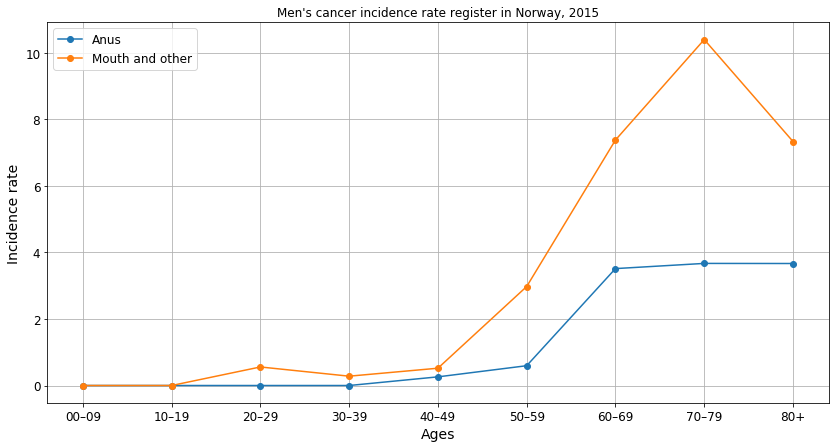

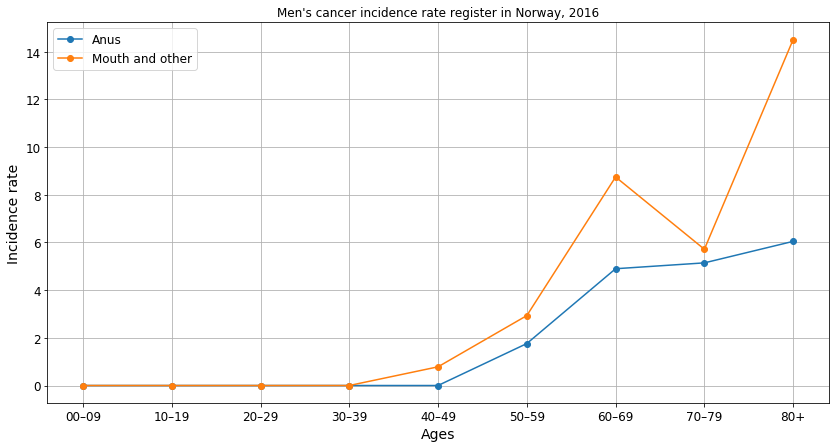

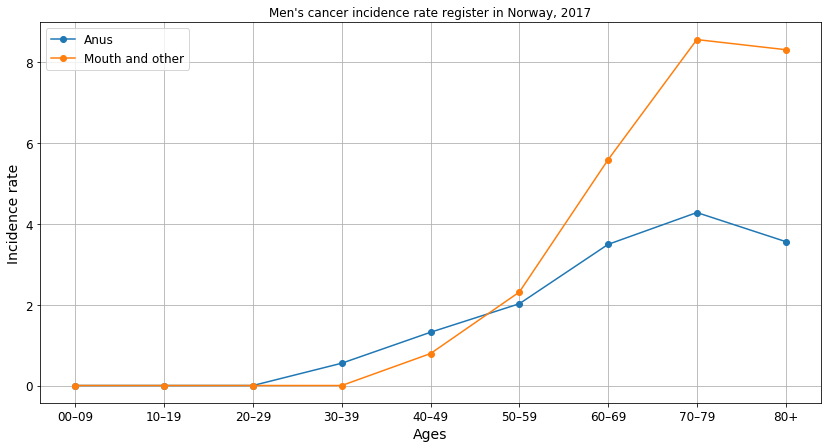

In [26]:
for i in range(len(cancer_anus_all_years)):
    fig, ax = mpf.plot(x, cancer_anus_all_years[i], titl="Men's cancer incidence rate register in Norway, "+str(year_labels[i])+"", Xlabel='Ages', 
                   Ylabel='Incidence rate', ltype = 'o-')
    ax.plot(x, cancer_other_all_years[i], 'o-')

    locator=MaxNLocator(nbins=9)
    ax.xaxis.set_major_locator(locator)
    ax.set_xticklabels(ages)
    ax.legend(c_label)
    
    ## saving figure
    fig.savefig("plots/Male/Men_cancer_incidence_"+str(labels[i])+".png")

#### Total per year case

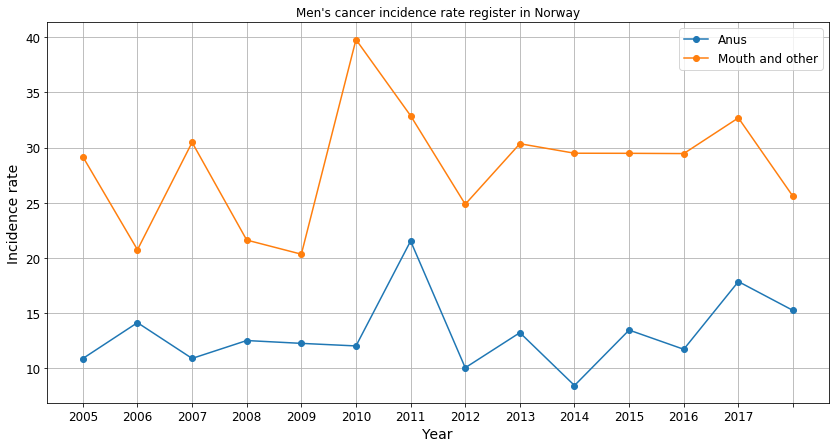

In [27]:
x = np.linspace(0,len(cancer_anus_all_years)-1, len(cancer_anus_all_years))

fig, ax = mpf.plot(x, total_cancer_A, titl="Men's cancer incidence rate register in Norway", Xlabel='Year', 
                   Ylabel='Incidence rate', ltype = 'o-')
ax.plot(x, total_cancer_MO, 'o-')

locator = MaxNLocator(nbins=len(cancer_anus_all_years)+1)
ax.xaxis.set_major_locator(locator)
ax.set_xticklabels(year_labels)
ax.legend(c_label)

## saving figure
fig.savefig("plots/Male/Men_cancer_total_incidence(year).png")

In [28]:
#### 